In [ ]:
from google.colab import drive
from google.colab import files
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import matplotlib.ticker as ticker

HW1: http://webpages.csus.edu/fitzgerald/homework-streaming-large-text-file/

**1 - subset**

5 pts

Download a small subset of the data (100 rows is plenty) to your personal computer, and examine it using any software you like. Briefly describe this subset of the data by picking out a couple rows that look interesting to you.

1. How many columns are there?

  > There are 61 columns in this sample dataset.

2. Do the data values in each column seem to match the column definitions?

  > Sometimes.There are a large number of empty values for numerous columns and one article regarding President Trump and his administration had Actor2Code: COP and Actor2Name: DEPUTY when there is no mention of either in the article.

3. What character delimits the records?

  > It seems TAB delimits the record.

4. What is the CAMEO event code, what event does this correspond to, and what is the Goldstein score?

  > A raw CAMEO event code describes the action that Actor1 (person, place, etc.) performed upon Actor2 during an event. A Goldstein score is an assigned numberic score between -10 and +10, which tries to capture the potential impact that the type of event will have on the stability of a country for every CAMEO event code.

5. Are the URL’s to the news articles still live, and do they match the CAMEO event code?

  > Some URL's still work and others do not.

6. Does the Goldstein score appear to be doing what it was designed to do?

  > It's hard to tell. There seems to be multiple duplicate articles and some of them do not have the same Goldstein scores. Such as the [article](https://www.gattonstar.com.au/news/unlicensed-driver-in-reckless-rampage-through-town/3301292/) which recieved both a Goldstein score of -9.2 **and** 2.8.

**2 - histogram**

10 pts

Create a histogram of the Goldstein scores for all of 2018, using the integers as bin endpoints for the histogram. It’s possible to do this in less than 10 minutes using a single shell pipeline on a t2 micro instance with 1 vCPU, 1 GiB memory, and 8 GiB storage.

In [ ]:
bins = pd.read_csv('/content/drive/My Drive/Sac State/STAT196K/HW1/bins.csv')

1. How long does your program take to run?

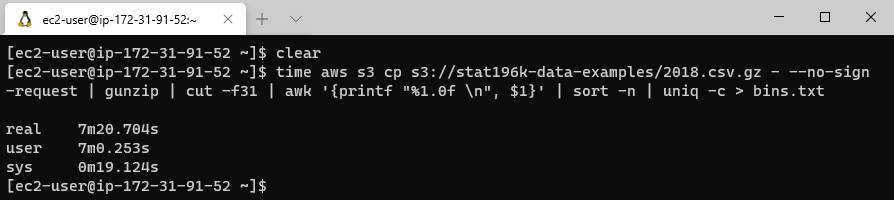

2. Explain in detail what each command in the pipeline does and how they work together.

> **time**: Times how long it takes for a given script or command to run.

> **aws s3 cp**: Copy file from S3 storage to my EC2 instance.

> **gunzip**: unzip the file from S3 storage.

> **cut -f31**: Filter to the 31th column of the file.

> **awk '{printf "%1.0f \n", $1}'**: Round the values to the nearest whole number.

> **sort -n**: Sort the values numerically in ascending order.

> **uniq -c**: Count the number of times a line was repeated.

My pipeline consists of six commands that serve as input of another command starting with **copying** the 2018.csv.gz file from AWS S3 storage. Then it will **unzip** the file so it can be **cut** in order to filter the file to a specific column field for the Goldstein score. Afterwards, the float values will be **rounded** then **sorted** in ascending order. Finally, it will **count** the number of times a value was repeated and print the results as a .txt file.

3. Plot and interpret the histogram. You’ll probably want to download the summary statistics (around 20 numbers) to your personal computer to plot the histogram. Do you notice anything strange?

  > The first thing that is strange to me is that +3 scores are the most frequent but there are no scores for -3. The second most frequent score is 0, what is the meaning of a 0 score - unrelated news? For scores -10 and +10, there are significantly more -10 scores than there are +10 scores. Since the scores are supposed to represent the potential impact an event has on the stability of a country, how come it appears more common for maximum negative impact scores to occur significanly more often than maximum positive impacts?

In [ ]:
def millions(x, pos):
    'The two args are the value and ticker position'
    return '%1.1fM' % (x*1e-6)

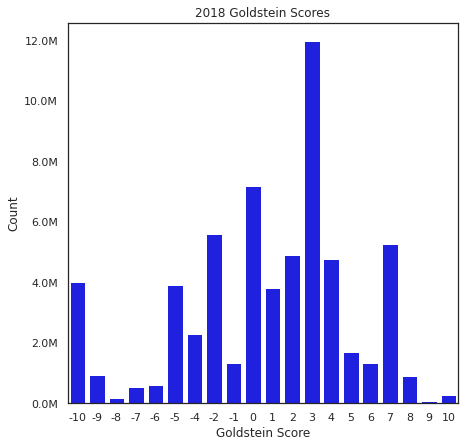

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = sns.barplot(data=bins, x="score", y="count", color="blue")
ax.set_title('2018 Goldstein Scores')
ax.set_xlabel('Goldstein Score')
ax.set_ylabel('Count')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions));
plt.show()

4. Exactly how many events (rows) are in this data?

In [ ]:
print('There are %s events(rows) in this data' % bins['count'].sum())

There are 61544481 events(rows) in this data


**3 - performance**

5 pts

Print and interpret the output of **top** while your program is running.

1. What are the bottlenecks? **t2.micro**

  > The main bottleneck is gzip(gunzip), which is understandable given how large the file is. 

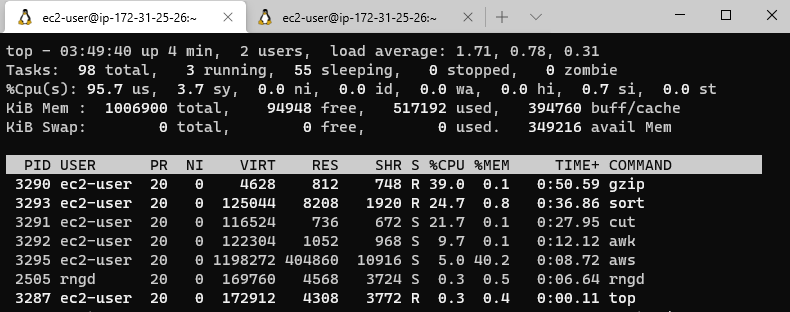

2. Run and time your program on an EC2 instance with more vCPU’s and a faster network and show the results of **top** once more. Is the program faster on the more expensive instance? **t2.xlarge**

  > Yes! The t2.xlarge instance was much faster (x1.7) than the t2.micro instance.

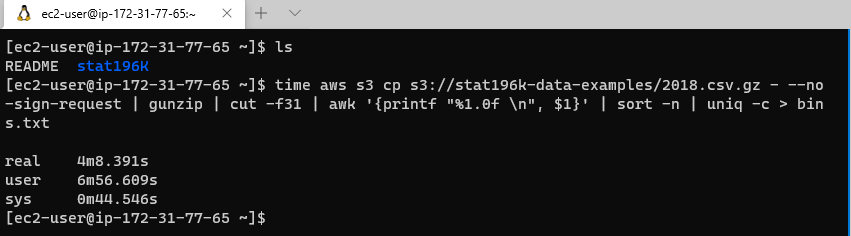

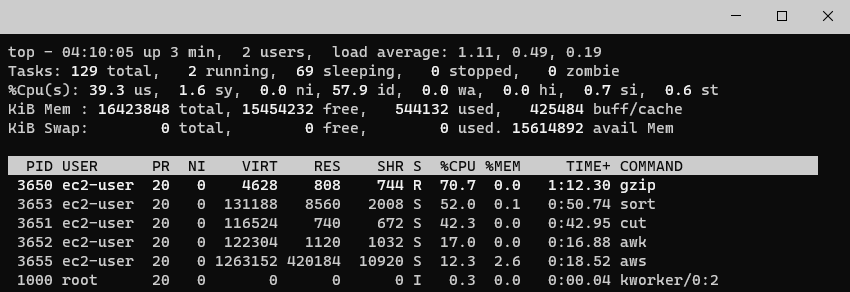

3. Are you benefitting from pipeline parallelism?

  > Although it is not optimized given that t2.xlarge's max mapacity 400%CPU, I am still benefiting from some pipeline parallelism because by adding up the %CPU of my commands - it amounts to 194%.

4. What’s the bottleneck now? **t2.xlarge**

  > The bottleneck for the t2.xlarge instance is still the same as the t2.micro instance, which is gzip(gunzip). Which makes sense because I need the data from gzip to use my remaining commands.

5. Compare and comment on the financial cost of using a more expensive instance versus the t2.micro. Is it worth it?

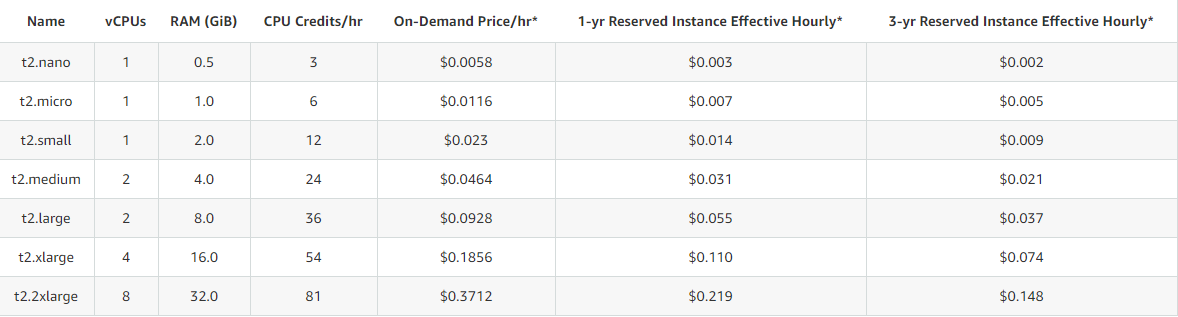

  > While the price of the t2.xlarge is **relatively** larger than the cost of using the t2.instance, the higher cost is negliable compared to the time that is saved based on the results of my pipeline (248 sec vs 422 sec), the t2.xlarge is **1.7** times faster. Comparatively, for a process that would take 10,000 seconds (2.7 hrs) to run on t2.micro - the amount of time saved by using t2.xlarge would be 5,882 seconds (1.6 hrs) while the amount of money saved by using t2.micro would be around $0.20. Thus, it is worth using t2.xlarge over t2.micro instances because the amount of time saved outweighs the cost.

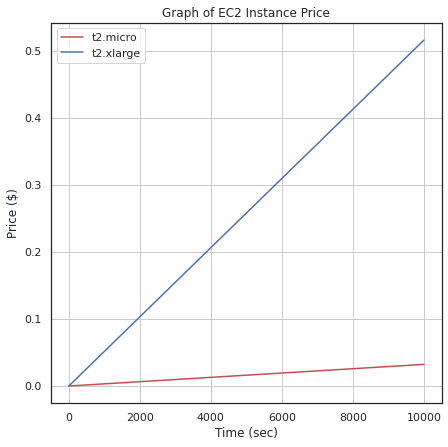

In [ ]:
fig = plt.figure(figsize=(7,7))
x = np.linspace(0,10000)
plt.plot(x, 0.0116*(x/3600), '-r', label='t2.micro')
plt.plot(x, 0.1856*(x/3600), '-b', label='t2.xlarge')
plt.title('Graph of EC2 Instance Price')
plt.xlabel('Time (sec)', color='#1C2833')
plt.ylabel('Price ($)', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()